# **Chess Piece Detection Using Transfer Learning With YOLOv5 Network**

##**Import libraries**

In [1]:
import torch
import torchvision
from google.colab import drive
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


##**Setup**

In [3]:
!git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 12536, done.
remote: Counting objects: 100% (88/88), done.
remote: Compressing objects: 100% (59/59), done.
remote: Total 12536 (delta 49), reused 58 (delta 29), pack-reused 12448
Receiving objects: 100% (12536/12536), 12.27 MiB | 6.61 MiB/s, done.
Resolving deltas: 100% (8641/8641), done.


In [ ]:
!pip install -r /content/yolov5/requirements.txt

##**Loading the  chess dataset**

In [2]:
!unzip -q /content/gdrive/MyDrive/Chess.zip -d chess

In [3]:
!cp /content/chess/chess.yaml /content/yolov5/data

## **Training**

In [ ]:
# Train YOLOv5s on chess dataset for 10 epochs
!python /content/yolov5/train.py --img 640 --batch 16 --epochs 10 --data chess.yaml --weights yolov5s.pt --cache

## **Inference**

In [ ]:
!python /content/yolov5/detect.py --weights /content/yolov5/runs/train/exp/weights/best.pt --source /content/chess/test/images 

##**Visualizing results**

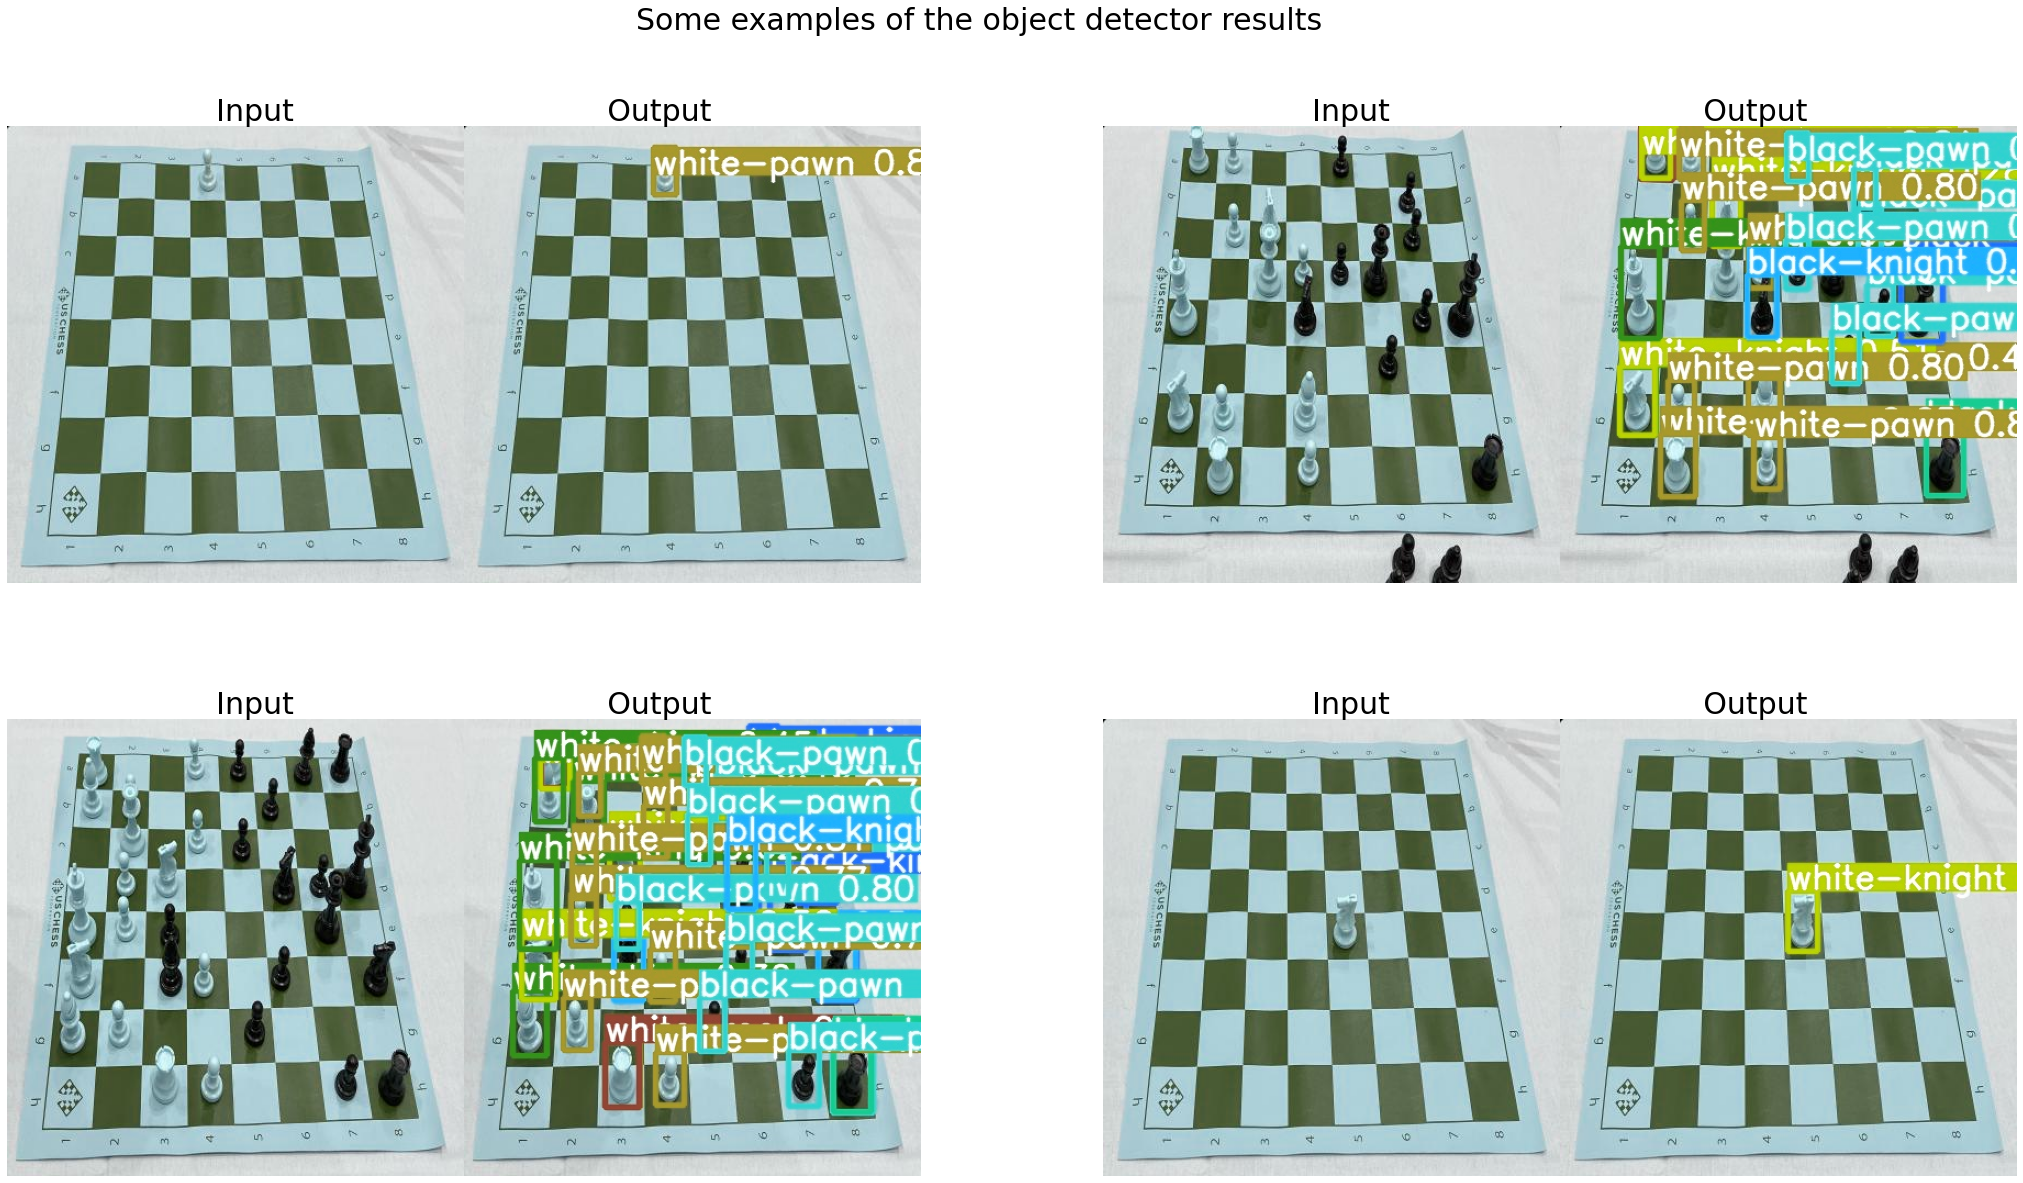

In [6]:
plt.figure(figsize=(36, 20))
#plt.subplots_adjust(hspace=0.5)
plt.suptitle("Some examples of the object detector results", fontsize=30, y=0.95)

test_images = glob.glob('/content/chess/test/images/*')
prediction_images = glob.glob('/content/yolov5/runs/detect/exp/*')

ziped_list = list(zip(test_images[16:20],prediction_images[16:20]))

for n, data in enumerate(ziped_list):
    im_test = cv2.imread(data[0])
    im_predict = cv2.imread(data[1])
    result = np.concatenate((im_test,im_predict),axis=1)
    ax = plt.subplot(2, 2, n + 1)
    plt.title("Input                                 Output", fontsize=30)
    plt.imshow(result)
    plt.axis('off')

plt.show()



(-0.5, 2999.5, 2249.5, -0.5)

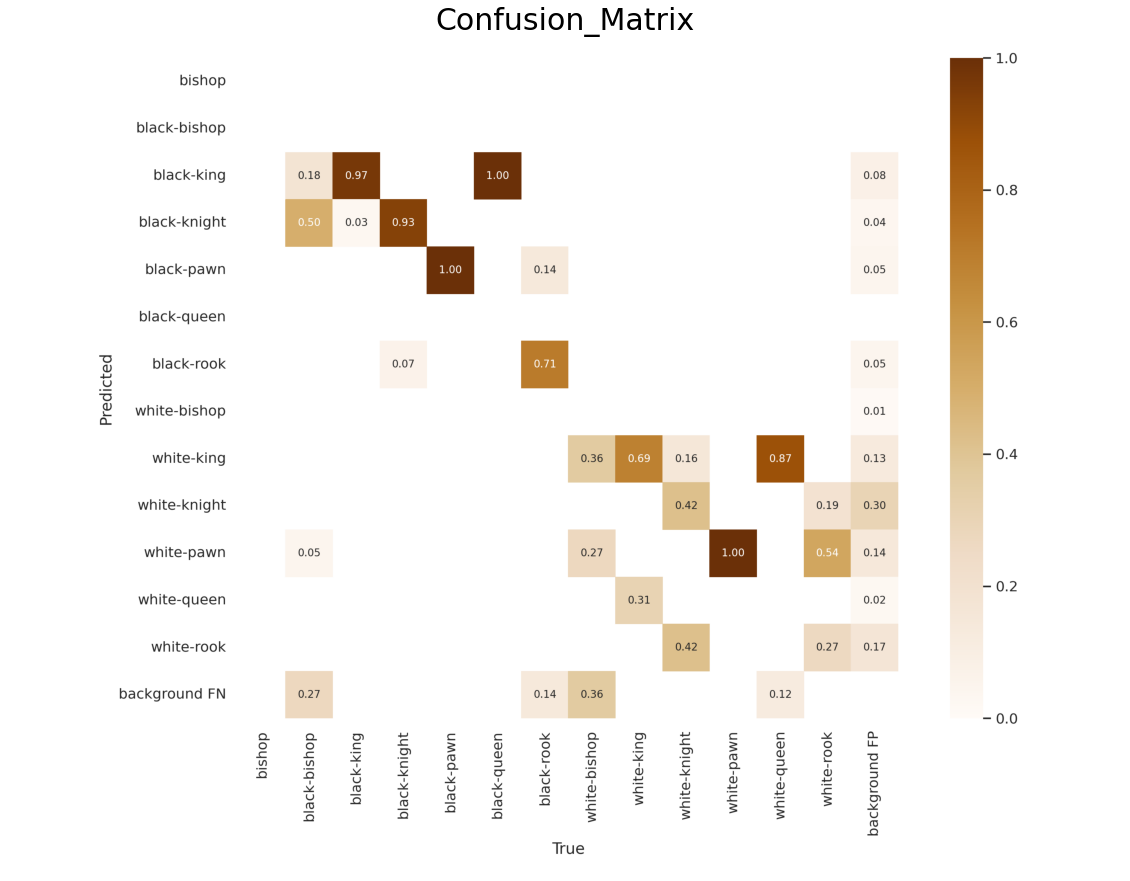

In [7]:
plt.figure(figsize=(20, 20))
plt.title('Confusion_Matrix', fontsize=30)
plt.imshow(cv2.imread('/content/yolov5/runs/train/exp/confusion_matrix.png'))
plt.axis('off')

(-0.5, 2399.5, 1199.5, -0.5)

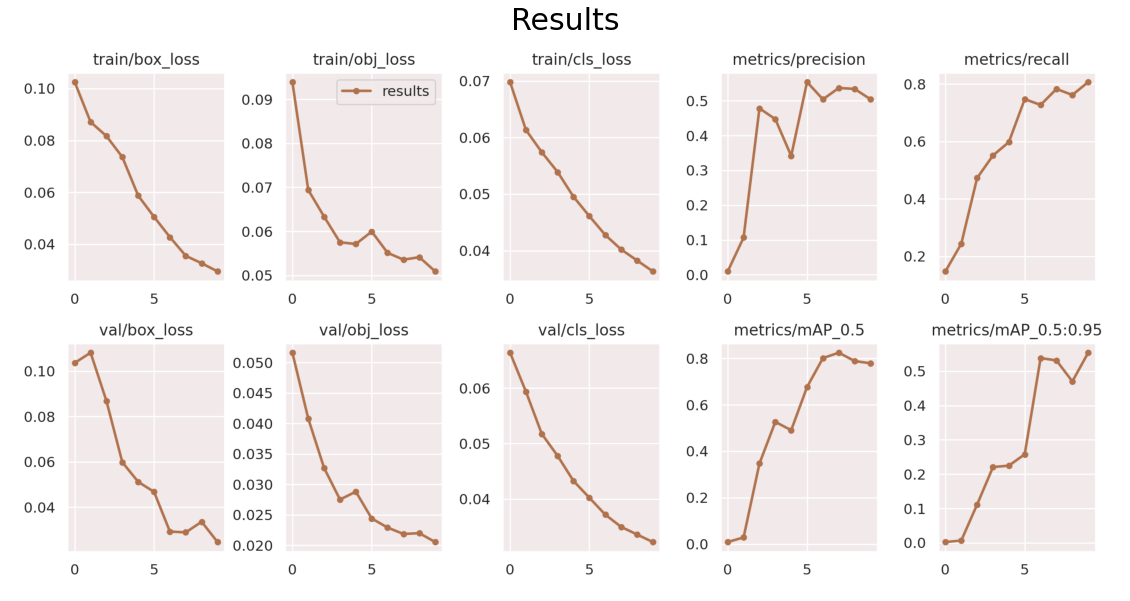

In [8]:
plt.figure(figsize=(20, 20))
plt.title('Results', fontsize=30)
plt.imshow(cv2.imread('/content/yolov5/runs/train/exp/results.png'))
plt.axis('off')